In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv


Age: 0.0
Gender: 0.007795406730291443
Ethnicity: 0.0
SocioeconomicStatus: 0.0026723563101425096
EducationLevel: 0.0
BMI: 0.0
Smoking: 0.009470308459985421
AlcoholConsumption: 0.001607081143274236
PhysicalActivity: 0.010827933623714925
DietQuality: 0.006665346103224001
SleepQuality: 0.0
FamilyHistoryKidneyDisease: 0.005319723570936574
FamilyHistoryHypertension: 0.005737949878310777
FamilyHistoryDiabetes: 0.0
PreviousAcuteKidneyInjury: 0.0
UrinaryTractInfections: 0.0
SystolicBP: 0.014746859304448634
DiastolicBP: 0.0
FastingBloodSugar: 0.012215618661849392
HbA1c: 0.005697834375896438
SerumCreatinine: 0.023040538070799643
BUNLevels: 0.009361569284894733
GFR: 0.016343240757263455
ProteinInUrine: 0.011825315726355923
ACR: 0.0
SerumElectrolytesSodium: 0.008847899520632252
SerumElectrolytesPotassium: 0.0
SerumElectrolytesCalcium: 0.0049001421873344775
SerumElectrolytesPhosphorus: 0.0
HemoglobinLevels: 0.0022748372579437515
CholesterolTotal: 0.008313476988379476
CholesterolLDL: 0.0
CholesterolH

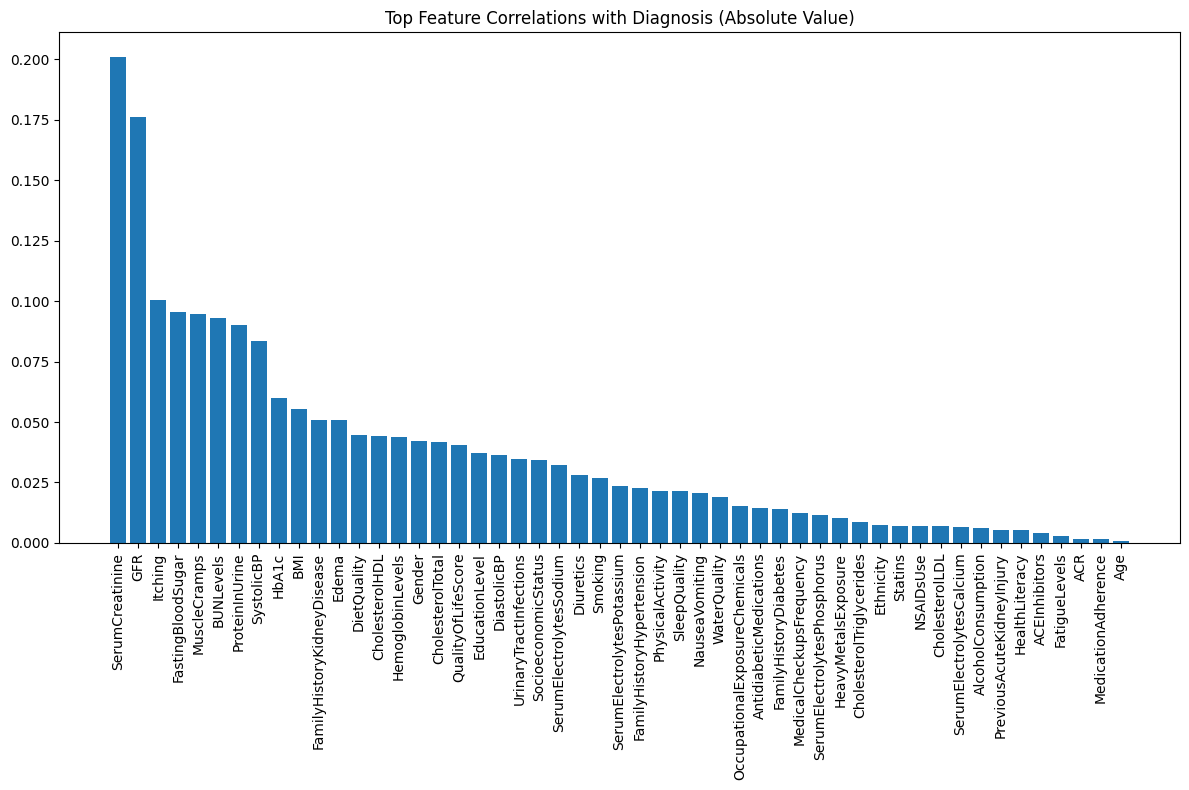


Top 10 Correlated Features with Diagnosis
SerumCreatinine: 0.2011
GFR: 0.1760
Itching: 0.1007
FastingBloodSugar: 0.0957
MuscleCramps: 0.0948
BUNLevels: 0.0931
ProteinInUrine: 0.0900
SystolicBP: 0.0835
HbA1c: 0.0600
BMI: 0.0552


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import os
from sklearn.feature_selection import mutual_info_classif
df = pd.read_csv("/kaggle/input/chronic-kidney-disease-dataset-analysis/Chronic_Kidney_Dsease_data.csv")
# Remove irrelevant columns, non-features
df = df.drop(columns=["PatientID", "DoctorInCharge"])
df = df.dropna()
# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)
# Separate features and target
y = df_encoded["Diagnosis"]
X = df_encoded.drop(columns=["Diagnosis"])
# Compute correlation of each feature with the target
correlations = X.corrwith(y).abs()
# Sort features by correlation
sorted_corr = correlations.sort_values(ascending=False)
mi = mutual_info_classif(X, y)
for i, score in enumerate(mi):
    print(f"{X.columns[i]}: {score}")
# Plot top features
plt.figure(figsize=(12, 8))
plt.title("Top Feature Correlations with Diagnosis (Absolute Value)")
plt.bar(range(len(sorted_corr)), sorted_corr.values)
plt.xticks(range(len(sorted_corr)), sorted_corr.index, rotation=90)
plt.tight_layout()
plt.show()
# Print top 10 features
print("\nTop 10 Correlated Features with Diagnosis")
top_10_features = sorted_corr.index[:10]
for feature in top_10_features:
    print(f"{feature}: {correlations[feature]:.4f}")
# Save a subset of the dataset with top features and metadata
selected_columns = list(top_10_features) + ["Age", "Gender", "Diagnosis"]
df_subset = df[selected_columns]




Diagnosis
1    1524
0     135
Name: count, dtype: int64
Accuracy: 0.927710843373494

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.11      0.20        27
           1       0.93      1.00      0.96       305

    accuracy                           0.93       332
   macro avg       0.96      0.56      0.58       332
weighted avg       0.93      0.93      0.90       332


Confusion Matrix:
 [[  3  24]
 [  0 305]]


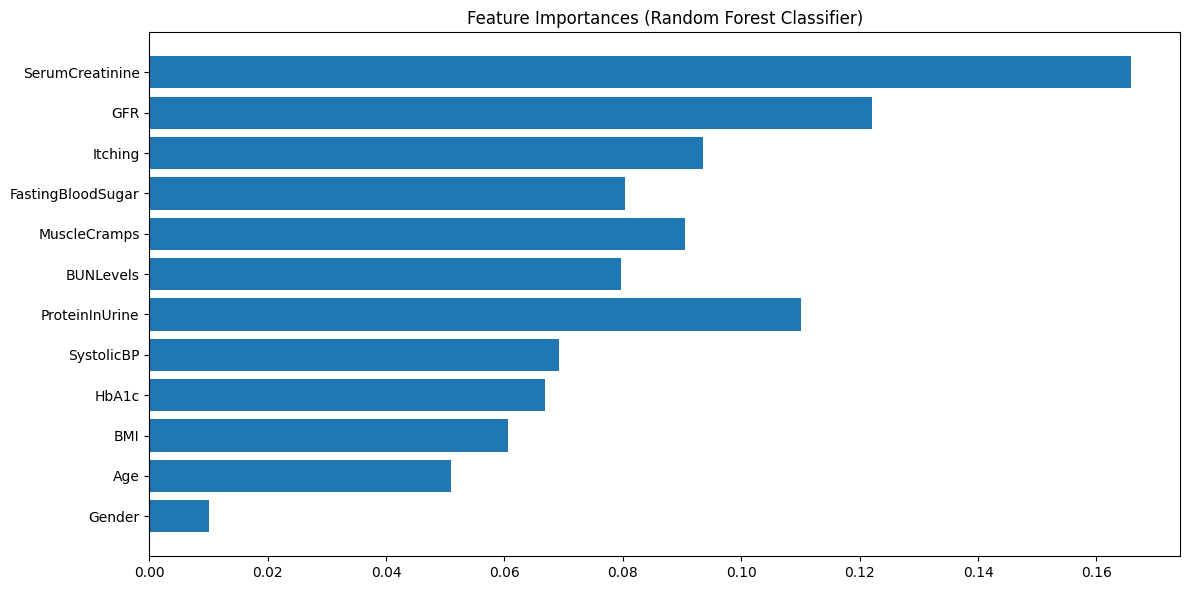

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# one-hot encode categorical columns
df_encoded = pd.get_dummies(df_subset, drop_first=True)

# Target is Diagnosis column (binary classification)
X = df_encoded.drop(columns=["Diagnosis"])
y = df_encoded["Diagnosis"]
print(y.value_counts())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics of the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances to see what features are most important in model decision making
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest Classifier)")
plt.barh(feature_names, importances)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


Diagnosis
1    1524
0     135
Name: count, dtype: int64
Accuracy: 0.9156626506024096

Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.07      0.12        27
           1       0.92      0.99      0.96       305

    accuracy                           0.92       332
   macro avg       0.66      0.53      0.54       332
weighted avg       0.88      0.92      0.89       332


Confusion Matrix:
 [[  2  25]
 [  3 302]]


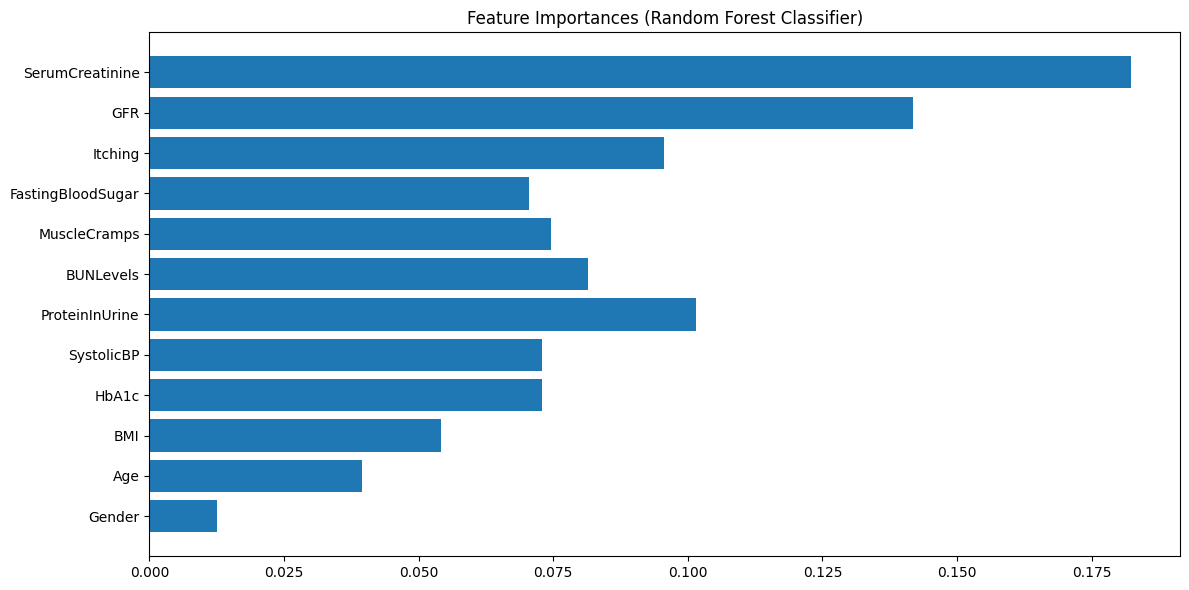

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# one-hot encode categorical columns
df_encoded = pd.get_dummies(df_subset, drop_first=True)

# Target is Diagnosis column (binary classification)
X = df_encoded.drop(columns=["Diagnosis"])
y = df_encoded["Diagnosis"]
print(y.value_counts())

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Initialize and train the model
model = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics of the model 
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot feature importances to see what features are most important in model decision making
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
plt.title("Feature Importances (Random Forest Classifier)")
plt.barh(feature_names, importances)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [5]:
import torch
from torch.utils.data import TensorDataset, DataLoader


# Drop the target column (unsupervised training)
X = df_subset.drop(columns=["Diagnosis"])

# Convert to torch tensor
X_tensor = torch.tensor(X.values, dtype=torch.float32)

# Normalize
X_mean = X_tensor.mean(dim=0)
X_std = X_tensor.std(dim=0)
X_tensor = (X_tensor - X_mean) / X_std

# Create dataset and dataloader
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

input_dim = X.shape[1]


In [6]:
import torch.nn as nn

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8)
        )
        self.decoder = nn.Sequential(
            nn.Linear(8, 16),
            nn.ReLU(),
            nn.Linear(16, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [7]:
import torch.optim as optim
import matplotlib.pyplot as plt

model = Autoencoder(input_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

num_epochs = 50
losses = []

for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        x_batch = batch[0]
        output = model(x_batch)
        loss = criterion(output, x_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    losses.append(avg_loss)
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")


Epoch 1, Loss: 0.7604
Epoch 11, Loss: 0.3154
Epoch 21, Loss: 0.3078
Epoch 31, Loss: 0.2997
Epoch 41, Loss: 0.3006
Epoch 50, Loss: 0.2944


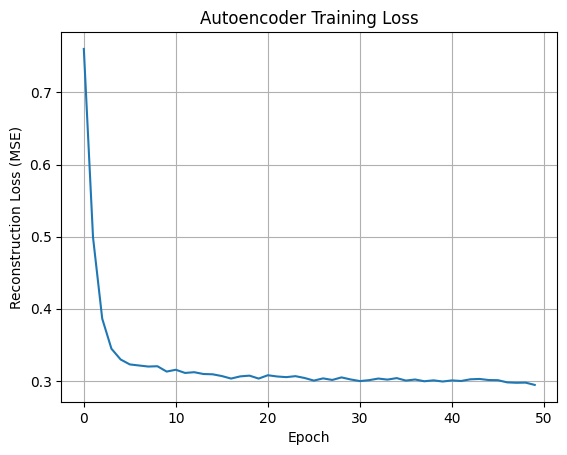

In [8]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (MSE)")
plt.title("Autoencoder Training Loss")
plt.grid(True)
plt.show()


In [9]:
# Run encoder to get compressed representation
with torch.no_grad():
    compressed_features = model.encoder(X_tensor).numpy()

# You can view or save these features for other tasks
compressed_df = pd.DataFrame(compressed_features, columns=[f"z{i+1}" for i in range(compressed_features.shape[1])])
compressed_df.head()


,z1,z2,z3,z4,z5,z6,z7,z8
0,0.326455,-0.587278,-0.758816,0.606604,-0.390230,0.041748,-0.191897,1.068724
1,0.291108,0.685255,-0.753829,-0.576423,1.294142,0.768729,-1.074614,0.278187
2,1.572361,0.547174,-0.765141,-0.611355,-0.091792,0.440282,-1.362289,0.392513
3,0.198421,1.823896,-0.706475,-1.023443,2.012535,2.174495,-2.771971,-0.206418
4,1.191948,1.192201,-1.334840,-1.233162,1.980294,3.132798,-1.347598,-0.745865
